In [24]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from stats_ops import calculate_metrics
from analysis_utils import count_num_irrigated_pixels
from plots import make_line_plot_with_error, make_pumping_comparison_scatter_plot, join_plot_together

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


--------------------------------------

In [25]:
model_version = 'v11'   ###################

# Scatter plot comparison
`actual vs predicted pumping`

In [26]:
# GW-dominated
ml_df = pd.read_csv(f'../../Model_run/basin_comparison_results/annual_pumping_ML_{model_version}.csv')

gw_dominated = ['gmd4', 'gmd3', 'rpb', 'slv', 'hqr', 'doug', 'scruz', 'dv']
ml_df = ml_df[ml_df['basin_code'].isin(gw_dominated)]
ml_df = ml_df.dropna()

error_dict = calculate_metrics(predictions=ml_df['mean pred_pumping_mm'], targets=ml_df['mean actual_pumping_mm'])
print('\nGW-dependent')
print('--------------')
print(f'Basins: {gw_dominated}')
print(f"\nR2: {error_dict['R2']:.3f}")
print(f"RMSE: {error_dict['RMSE']:.3f} mm/year")
print(f"MAE: {error_dict['MAE']:.3f} mm/year")          

print(error_dict)


GW-dependent
--------------
Basins: ['gmd4', 'gmd3', 'rpb', 'slv', 'hqr', 'doug', 'scruz', 'dv']

R2: 0.807
RMSE: 14.027 mm/year
MAE: 8.727 mm/year
{'RMSE': 14.026708355469648, 'MAE': 8.727254255379892, 'R2': 0.8069148576685687, 'Normalized RMSE': 0.3339962010131967, 'Normalized MAE': 0.20780853873221788, 'PBIAS': -14.776201020487775}


In [27]:
ml_df = pd.read_csv(f'../../Model_run/basin_comparison_results/annual_pumping_ML_{model_version}.csv')

gw_dominated = ['gmd4', 'gmd3', 'rpb', 'slv', 'hqr', 'doug', 'scruz', 'dv']
ml_df = ml_df[ml_df['basin_code'].isin(gw_dominated)]
ml_df = ml_df.dropna()

mean_error_bias = np.sum(ml_df['mean actual_pumping_mm'] - ml_df['mean pred_pumping_mm']) / len(ml_df)

print(f'Basins: {gw_dominated}')
print(f'mean error (bias) = {mean_error_bias}')

Basins: ['gmd4', 'gmd3', 'rpb', 'slv', 'hqr', 'doug', 'scruz', 'dv']
mean error (bias) = -6.205503586191563


In [28]:
ml_df = pd.read_csv(f'../../Model_run/basin_comparison_results/annual_pumping_ML_{model_version}.csv')

# dropping nan values (some basins has no actual pumping data for years)
ml_df = ml_df[['basin_code', 'mean pred_pumping_mm', 'mean actual_pumping_mm']]
ml_df = ml_df.dropna()

# naming basins
basin_name = {
        'gmd3': 'GMD3, KS',
        'gmd4': 'GMD4, KS',
    }

ml_df['basin'] = ml_df['basin_code'].map(basin_name)
ml_df = ml_df[ml_df['basin'].isin(list(basin_name.values()))]

save_path = '../../Model_run/plots/scatter_KS.jpg'

# plotting
make_pumping_comparison_scatter_plot(df=ml_df, x='mean pred_pumping_mm', y='mean actual_pumping_mm', 
                                     hue='basin', xlabel='Predicted pumping\n(mm/year)', ylabel='Metered pumping\n(mm/year)', 
                                     fontsize=16, lim=(0, 160),
                                     scientific_ticks=False,
                                     figsize=(4, 4), savepath=save_path,
                                     legend='on', legend_font=10,
                                     inset_basins=None)
plt.close()

In [29]:
ml_df = pd.read_csv(f'../../Model_run/basin_comparison_results/annual_pumping_ML_{model_version}.csv')

# dropping nan values (some basins has no actual pumping data for years)
ml_df = ml_df[['basin_code', 'mean pred_pumping_mm', 'mean actual_pumping_mm']]
ml_df = ml_df.dropna()

# naming basins
basin_name = {
        'rpb': 'Republican River Basin, CO',
        'slv': 'Rio Grande River Basin, CO'
    }

ml_df['basin'] = ml_df['basin_code'].map(basin_name)
ml_df = ml_df[ml_df['basin'].isin(list(basin_name.values()))]

save_path = '../../Model_run/plots/scatter_CO.jpg'

# plotting
make_pumping_comparison_scatter_plot(df=ml_df, x='mean pred_pumping_mm', y='mean actual_pumping_mm', 
                                     hue='basin', xlabel='Predicted pumping\n(mm/year)', ylabel='Metered pumping\n(mm/year)', 
                                     fontsize=16, lim=(0, 80),
                                     scientific_ticks=False,
                                     figsize=(4, 4), savepath=save_path,
                                     legend='on', legend_font=10,
                                     inset_basins=None)
plt.close()

In [30]:
ml_df = pd.read_csv(f'../../Model_run/basin_comparison_results/annual_pumping_ML_{model_version}.csv')

# dropping nan values (some basins has no actual pumping data for years)
ml_df = ml_df[['basin_code', 'mean pred_pumping_mm', 'mean actual_pumping_mm']]
ml_df = ml_df.dropna()

# naming basins
basin_name = {
        'hqr': 'Harquahala INA, AZ',
        'doug': 'Douglas AMA, AZ',
        'scruz': 'Santa Cruz AMA, AZ',
        'dv': 'Diamond Valley, NV'
    }

ml_df['basin'] = ml_df['basin_code'].map(basin_name)
ml_df = ml_df[ml_df['basin'].isin(list(basin_name.values()))]

save_path = '../../Model_run/plots/scatter_AZ_NV.jpg'

# plotting
make_pumping_comparison_scatter_plot(df=ml_df, x='mean pred_pumping_mm', y='mean actual_pumping_mm', 
                                     hue='basin', xlabel='Predicted pumping\n(mm/year)', ylabel='Metered pumping\n(mm/year)', 
                                     fontsize=16, lim=(0, 100),
                                     scientific_ticks=False,
                                     figsize=(4, 4), savepath=save_path,
                                     legend='on', legend_font=10,
                                     inset_basins=None)
plt.close()

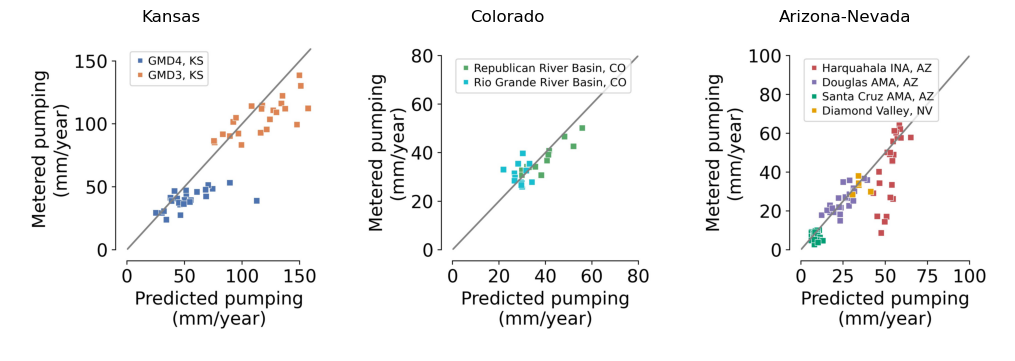

In [31]:
scatter_plots = ['../../Model_run/plots/scatter_KS.jpg',
                 '../../Model_run/plots/scatter_CO.jpg',
                 '../../Model_run/plots/scatter_AZ_NV.jpg']

titles = ['Kansas', 'Colorado', 'Arizona-Nevada']

join_plot_together(n_cols=3, plots_to_join=scatter_plots, 
                   fig_size=(10, 4), titles=titles, title_fontsize=12,
                   output_plot='../../Model_run/plots/scatter_all.jpg')

---------------------

# Basin time series

In [32]:
# dataframe load for time series plot
lobo_ml = pd.read_csv(f'../../Model_run/basin_comparison_results/annual_pumping_ML_LOBO_{model_version}.csv')

df_ml = pd.read_csv(f'../../Model_run/basin_comparison_results/annual_pumping_ML_{model_version}.csv')

In [33]:
df_ml.columns

Index(['year', 'pred_pumping_m3', 'actual_pumping_m3', 'pred_pumping_AF',
       'actual_pumping_AF', 'mean pred_pumping_mm', 'mean actual_pumping_mm',
       'basin_code', 'basin', 'mean low_mm', 'mean high_mm'],
      dtype='object')

In [34]:
# UTAH basins
df = pd.read_csv(f'../../Model_run/basin_comparison_results/annual_pumping_ML_{model_version}.csv')

ut_basin = ['pv', 'brl', 'cdr']
df_ut = df[df['basin_code'].isin(ut_basin)]
df_ut = df_ut.dropna()

error_dict_ut = calculate_metrics(predictions=df_ut['mean pred_pumping_mm'], targets=df_ut['mean actual_pumping_mm'])

print(f'\nBasins in Utah')
print('--------------')
print(error_dict_ut)


Basins in Utah
--------------
{'RMSE': 4.388064377594618, 'MAE': 3.304795139543345, 'R2': 0.19406579757973552, 'Normalized RMSE': 0.16823076452470148, 'Normalized MAE': 0.12670010398244352, 'PBIAS': -6.089231132002207}


# Kansas
-------------------

### GMD3

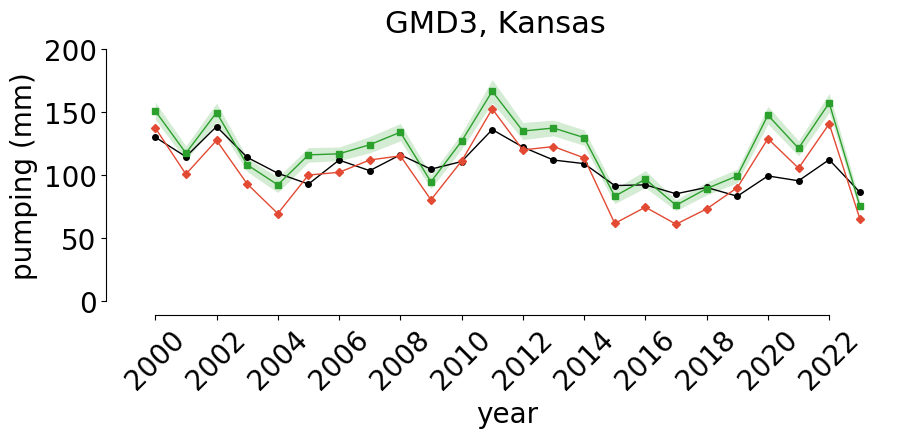

In [35]:
ml_lobo = lobo_ml[lobo_ml['basin_code'] == 'gmd3']
df_ml_sel = df_ml[df_ml['basin_code'] == 'gmd3']

save_path = '../../Model_run/plots/time_series_all/gmd3.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                          ml_lobo['mean pred_pumping_mm']],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['actual', 'predicted', 'LOBO'],   
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 200),
                          colors=None, markers=None, legend_pos='lower left',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='GMD3, Kansas')

### GMD4

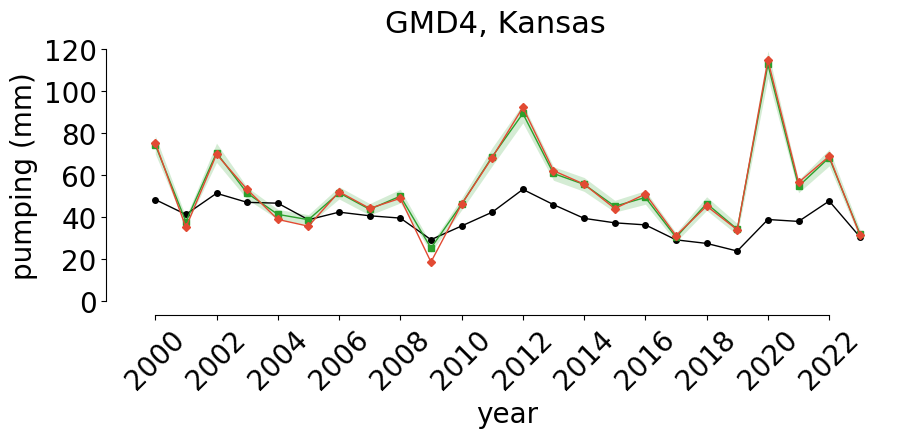

In [36]:
ml_lobo = lobo_ml[lobo_ml['basin_code'] == 'gmd4']
df_ml_sel = df_ml[df_ml['basin_code'] == 'gmd4']

save_path = '../../Model_run/plots/time_series_all/gmd4.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                          ml_lobo['mean pred_pumping_mm']],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['actual', 'predicted', 'LOBO'],   
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 120),
                          colors=None, markers=None, legend_pos='upper left',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='GMD4, Kansas')

# Colorado
-----------------

### Republican Basin

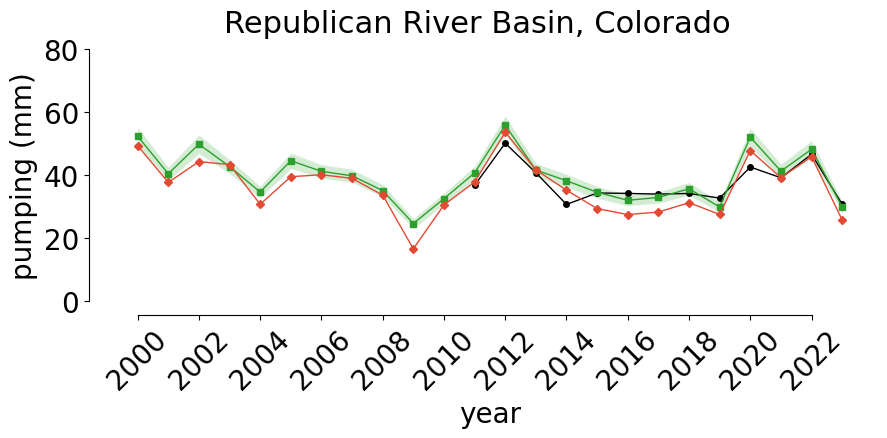

In [37]:
ml_lobo = lobo_ml[lobo_ml['basin_code'] == 'rpb']
df_ml_sel = df_ml[df_ml['basin_code'] == 'rpb']

save_path = '../../Model_run/plots/time_series_all/rpb.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                          ml_lobo['mean pred_pumping_mm']],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['actual', 'predicted', 'LOBO'],    
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 80),
                          colors=None, markers=None, legend_pos='upper left',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='Republican River Basin, Colorado')

### Rio Grande Basin

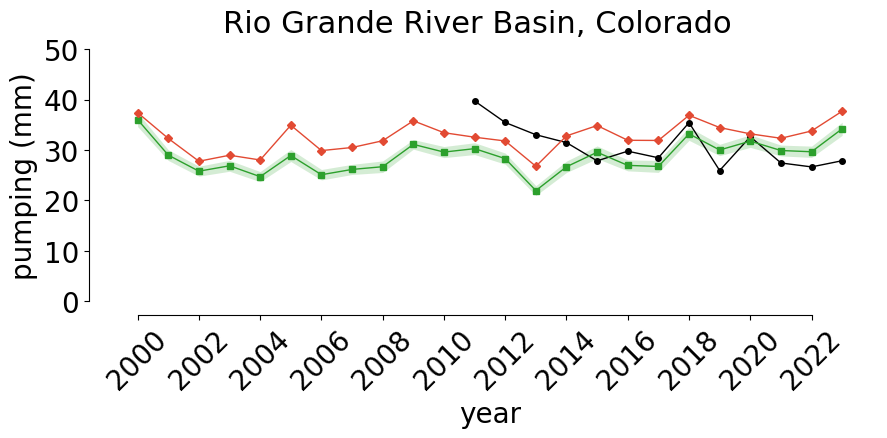

In [38]:
ml_lobo = lobo_ml[lobo_ml['basin_code'] == 'slv']
df_ml_sel = df_ml[df_ml['basin_code'] == 'slv']

save_path = '../../Model_run/plots/time_series_all/slv.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                          ml_lobo['mean pred_pumping_mm']],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['actual', 'predicted', 'LOBO'],   
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 50),
                          colors=None, markers=None, legend_pos='lower left',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='Rio Grande River Basin, Colorado')

# Arizona

### Harquahala INA

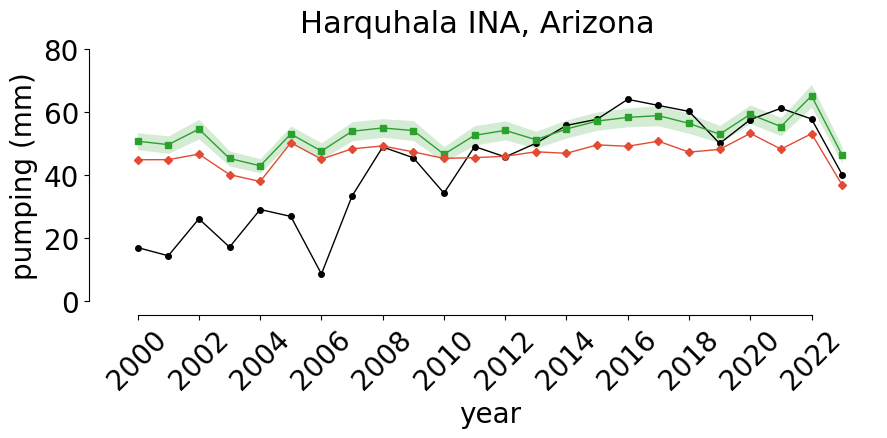

In [39]:
ml_lobo = lobo_ml[lobo_ml['basin_code'] == 'hqr']
df_ml_sel = df_ml[df_ml['basin_code'] == 'hqr']

save_path = '../../Model_run/plots/time_series_all/hqr.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                          ml_lobo['mean pred_pumping_mm']],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['actual', 'predicted', 'LOBO'],     
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 80),
                          colors=None, markers=None, legend_pos='upper left',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='Harquhala INA, Arizona')

`Why is the huge gap between predicted and irrigation before 2008?`
- There were more surface water rights before 2008. Our model doesn't capture such management decisions.

`This version is with 1% irr_frac.`

### Douglas AMA

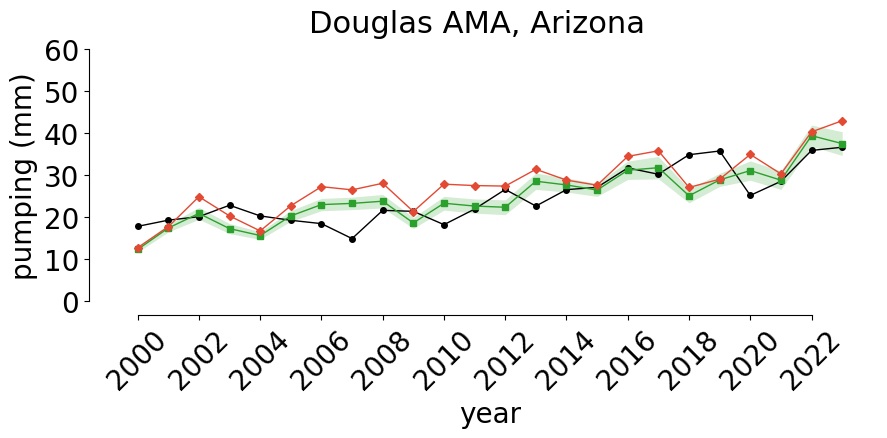

In [40]:
ml_lobo = lobo_ml[lobo_ml['basin_code'] == 'doug']
df_ml_sel = df_ml[df_ml['basin_code'] == 'doug']

save_path = '../../Model_run/plots/time_series_all/doug.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                          ml_lobo['mean pred_pumping_mm']],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['metered', 'predicted', 'Spatial holdout (LOBO)'],   
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 60),
                          colors=None, markers=None, legend_pos='upper left',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='Douglas AMA, Arizona')

### Santa Cruz AMA

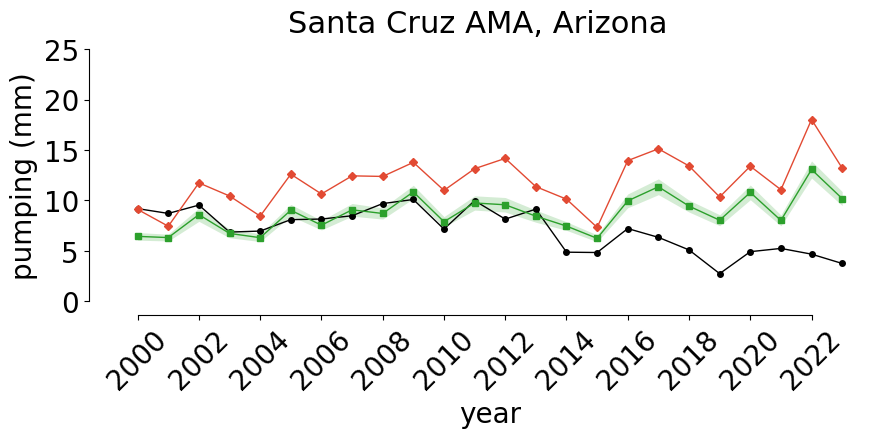

In [41]:
ml_lobo = lobo_ml[lobo_ml['basin_code'] == 'scruz']
df_ml_sel = df_ml[df_ml['basin_code'] == 'scruz']

save_path = '../../Model_run/plots/time_series_all/scruz.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                          ml_lobo['mean pred_pumping_mm']],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['actual', 'predicted', 'LOBO'],    
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 25),
                          colors=None, markers=None, legend_pos='upper left',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='Santa Cruz AMA, Arizona')

# Nevada
-------------------------

### Diamond Valley

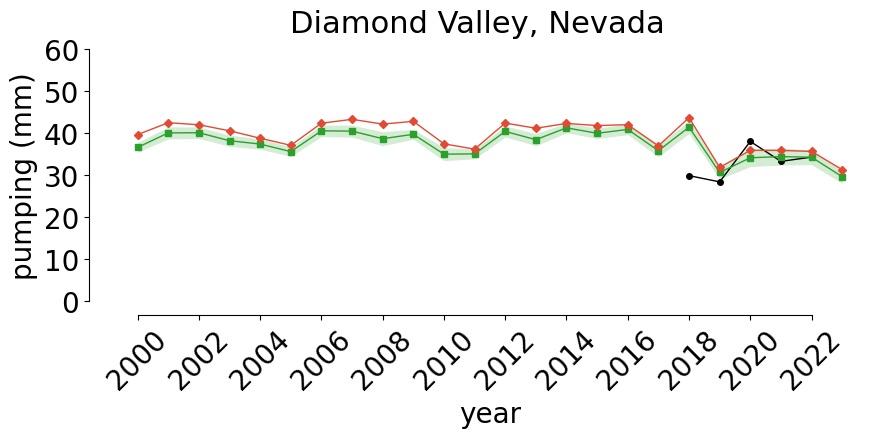

In [42]:
ml_lobo = lobo_ml[lobo_ml['basin_code'] == 'dv']
df_ml_sel = df_ml[df_ml['basin_code'] == 'dv']

save_path = '../../Model_run/plots/time_series_all/dv.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                          ml_lobo['mean pred_pumping_mm']],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['actual', 'predicted', 'LOBO'],   
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 60),
                          colors=None, markers=None, legend_pos='upper left',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='Diamond Valley, Nevada')

# Utah
----------------------------

### Parowan Valley

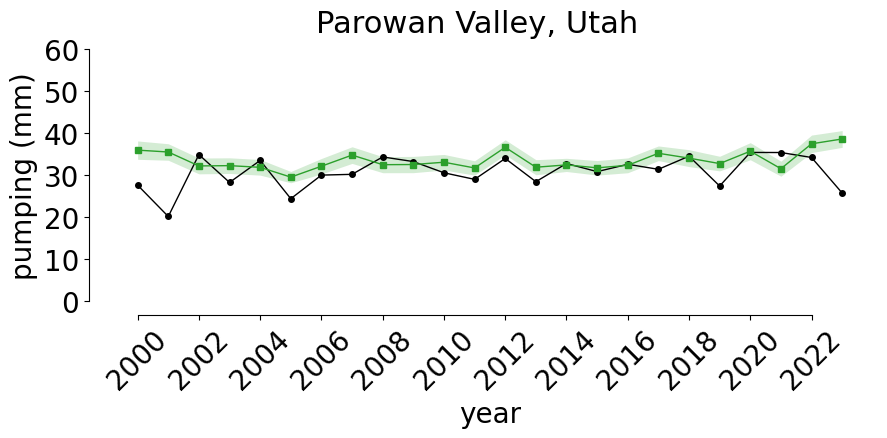

In [43]:
df_ml_sel = df_ml[df_ml['basin_code'] == 'pv']

save_path =  '../../Model_run/plots/time_series_all/pv.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                                   ],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['actual\n(power consumption)', 
                                       'predicted'],   
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 60),
                          colors=None, markers=None, legend_pos='lower right',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='Parowan Valley, Utah')

### Cedar Valley

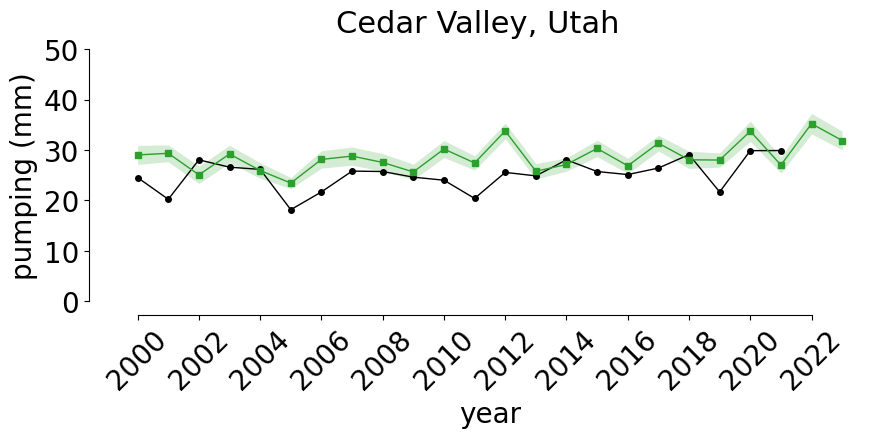

In [44]:
df_ml_sel = df_ml[df_ml['basin_code'] == 'cdr']

save_path = '../../Model_run/plots/time_series_all/cdr.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                                   ],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['actual\n(power consumption)', 
                                       'predicted'],   
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 50),
                          colors=None, markers=None, legend_pos='upper left',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='Cedar Valley, Utah')

### Beryl-Enterprise

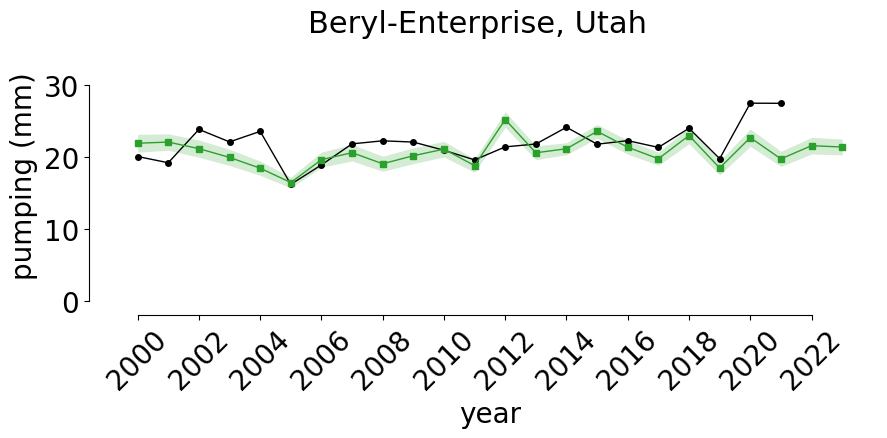

In [45]:
df_ml_sel = df_ml[df_ml['basin_code'] == 'brl']

save_path = '../../Model_run/plots/time_series_all/brl.jpg'

# plot
make_line_plot_with_error(y_series=[df_ml_sel['mean actual_pumping_mm'],
                          df_ml_sel['mean pred_pumping_mm'],
                                   ],
                          year=df_ml_sel['year'], 
                          fontsize=20, xlabel='year', ylabel='pumping (mm)',
                          line_labels=['actual\n(power consumption)', 
                                       'predicted'],  
                          low_CI=[None, df_ml_sel['mean low_mm'], None], 
                          high_CI=[None, df_ml_sel['mean high_mm'], None],
                          savepath=save_path, 
                          figsize=(10, 4), y_lim=(0, 35),
                          
                          colors=None, markers=None, legend_pos='upper left',
                          legend='off', no_xticks=False,
                          alpha_band=0.2, suptitle='Beryl-Enterprise, Utah')

In [46]:
# GW-dominated
ml_df = pd.read_csv(f'../../Model_run/basin_comparison_results/annual_pumping_ML_{model_version}.csv')

utah_basins = ['pv', 'cdr', 'brl']
ml_df = ml_df[ml_df['basin_code'].isin(utah_basins)]
ml_df = ml_df.dropna()

error_dict = calculate_metrics(predictions=ml_df['mean pred_pumping_mm'], targets=ml_df['mean actual_pumping_mm'])
print('\nUtah basins')
print('--------------')
print(f"\nR2: {error_dict['R2']:.3f}")
print(f"RMSE: {error_dict['RMSE']:.3f} mm/year")
print(f"MAE: {error_dict['MAE']:.3f} mm/year")          

print(error_dict)


Utah basins
--------------

R2: 0.194
RMSE: 4.388 mm/year
MAE: 3.305 mm/year
{'RMSE': 4.388064377594618, 'MAE': 3.304795139543345, 'R2': 0.19406579757973552, 'Normalized RMSE': 0.16823076452470148, 'Normalized MAE': 0.12670010398244352, 'PBIAS': -6.089231132002207}


------------------------

# LOBO results
 `**** Note: The 'actual' (reference) values here are the filtered pumping rasters.
For LOBO evaluation, we also use the respective basin’s filtered pixels, since unfiltered pixels 
violate physical constraints or contain data issues. Moreover, the model itself was trained on
filtered pixels, so using filtered pumping ensures an apples-to-apples comparison of model performance.`

In [8]:
basins = ['GMD3', 'GMD4', 'RPB', 'SLV', 'DOUG', 'HQR', 'SCRUZ', 'DV']

print('Individual basin performance with basin spatially holdout (ML): Pixel-scale comparison')
print('------------------------------------------------------------')

for basin in basins:
    pixel_csv = f'../../Model_run/ML_model/LOBO/{model_version}/{basin}/results/{basin}_results.csv'
    df = pd.read_csv(pixel_csv)
    
    metrics_dict = calculate_metrics(predictions=df['predicted'], targets=df['actual'])

    rmse, mae, r2, nrmse, nmae = metrics_dict['RMSE'], metrics_dict['MAE'], metrics_dict['R2'], \
                                  metrics_dict['Normalized RMSE'], metrics_dict['Normalized MAE'],

    print(f'{basin}: {rmse=:.2f}, {mae=:.2f}, {r2=:.2f}, {nrmse=:.2f}, {nmae=:.2f}')

Individual basin performance with basin spatially holdout (ML): Pixel-scale comparison
------------------------------------------------------------
GMD3: rmse=95.06, mae=67.96, r2=0.31, nrmse=0.54, nmae=0.38
GMD4: rmse=43.80, mae=32.39, r2=0.49, nrmse=0.49, nmae=0.36
RPB: rmse=72.19, mae=51.83, r2=0.29, nrmse=0.55, nmae=0.39
SLV: rmse=68.44, mae=55.45, r2=0.38, nrmse=0.42, nmae=0.34
DOUG: rmse=147.22, mae=111.08, r2=0.30, nrmse=0.82, nmae=0.62
HQR: rmse=230.40, mae=182.26, r2=-0.23, nrmse=0.61, nmae=0.48
SCRUZ: rmse=127.55, mae=96.90, r2=-0.15, nrmse=1.23, nmae=0.93
DV: rmse=105.37, mae=77.83, r2=0.26, nrmse=0.50, nmae=0.37


In [14]:
basins = ['gmd3', 'gmd4', 'rpb', 'slv', 'doug', 'hqr', 'scruz', 'dv']

print('Individual basin performance with basin spatially holdout (ML): Basin-scale comparison')
print('------------------------------------------------------------')

for basin in basins:
    basin_csv = f'../../Model_run/basin_comparison_results/annual_pumping_ML_LOBO_v11.csv'
    df = pd.read_csv(basin_csv)
    df = df[df['basin_code'] == basin]
    
    metrics_dict = calculate_metrics(predictions=df['mean pred_pumping_mm'], targets=df['mean actual_pumping_mm'])

    rmse, mae, r2, nrmse, nmae = metrics_dict['RMSE'], metrics_dict['MAE'], metrics_dict['R2'], \
                                  metrics_dict['Normalized RMSE'], metrics_dict['Normalized MAE'],

    print(f'{basin}: {rmse=:.2f}, {mae=:.2f}, {r2=:.2f}, {nrmse=:.2f}, {nmae=:.2f}')

Individual basin performance with basin spatially holdout (ML): Basin-scale comparison
------------------------------------------------------------
gmd3: rmse=17.59, mae=14.79, r2=-0.34, nrmse=0.17, nmae=0.14
gmd4: rmse=21.99, mae=15.75, r2=-7.57, nrmse=0.55, nmae=0.40
rpb: rmse=4.16, mae=3.57, r2=0.49, nrmse=0.11, nmae=0.10
slv: rmse=5.67, mae=4.88, r2=-1.01, nrmse=0.18, nmae=0.16
doug: rmse=5.93, mae=5.02, r2=0.12, nrmse=0.24, nmae=0.20
hqr: rmse=15.64, mae=12.03, r2=0.12, nrmse=0.37, nmae=0.28
scruz: rmse=5.80, mae=4.90, r2=-6.67, nrmse=0.82, nmae=0.69
dv: rmse=6.57, mae=4.67, r2=-2.74, nrmse=0.20, nmae=0.14


--------------------

# Comparing irrigated cropland for each basins
`Here, we compare actual (metered) pumping pixels vs RS-based pumping pixles).`

In [40]:
def make_pumping_comparison_scatter_plot(df, x, y, hue,
                                         xlabel, ylabel, fontsize, lim,
                                         scientific_ticks=True, scilimits=(4, 4),
                                         figsize=(6, 4), savepath=None,
                                         legend='on', legend_font=10,
                                         inset_basins=None, inset_lim=None,
                                         inset_lim_gap=5):
    """
    Plots a basin-wise scatter plot comparing predicted vs. actual pumping, with an optional inset zoom.

    :param df: pd.DataFrame
        DataFrame containing the variables for plotting.
    :param x: str
        Column name representing the predicted pumping values (x-axis).
    :param y: str
        Column name representing the actual pumping values (y-axis).
    :param hue: str
        Column name used to group points by color (e.g., 'basin').
    :param xlabel: str
        Label for the x-axis.
    :param ylabel: str
        Label for the y-axis.
    :param fontsize: int
        Font size for labels and ticks.
    :param lim: tuple of (float, float)
        Axis limits for both x and y axes (assumes square plot).
    :param scientific_ticks: bool, optional (default=True)
        Whether to format ticks in scientific notation.
    :param scilimits: tuple, optional (default=(4, 4))
        Limits for triggering scientific notation in tick labels.
    :param figsize: tuple, optional (default=(6, 4))
        Size of the overall figure in inches.
    :param savepath: str or None, optional (default=None)
        File path to save the figure. If None, figure is not saved.
    :param legend: str, optional (default='on')
        If 'on', displays the legend; otherwise, legend is removed.
    :param legend_font: Legend's font size. Default set to 10.
    :param inset_basins: list of str or None, optional
        List of basins to include in an inset zoom plot. If None, inset is not shown.
    :param inset_lim: tuple or None, optional
        Axis limits for the inset plot (x and y). If None, defaults to (0, 30).
    :param inset_lim_gap: xlim and ylim intervals for the inset. Default set to 5.

    :return: None
    """

    basin_colors = {
        'GMD4': '#4c72b0',
        'GMD3': '#dd8452',
        'Republican River Basin': '#55a868',
        'South Platte River Basin': '#e377c2',
        'Arkansas River Basin': '#ffb000',
        'Rio Grande River Basin': '#17becf',
        'Harquahala INA': '#c44e52',
        'Douglas AMA': '#8172b3',
        'Phoenix AMA': '#937860',
        'Pinal AMA': '#8c8c8c',
        'Tucson AMA': '#EE6677',
        'Santa Cruz AMA': '#009E73',
        'Diamond Valley': '#E69F00',
        'Parowan Valley': '#E69F00'
    }

    fig, ax = plt.subplots(figsize=figsize)
    plt.rcParams['font.size'] = fontsize

    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette=basin_colors,
                    marker='s', s=30, ax=ax)

    ax.plot([0, 1], [0, 1], 'gray', transform=ax.transAxes)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_xlim(lim)
    ax.set_ylim(lim)

    if scientific_ticks:
        ax.ticklabel_format(style='sci', scilimits=scilimits)
        ax.tick_params(axis='both', labelsize=fontsize)

    if legend != 'on':
        if ax.get_legend() is not None:
            ax.get_legend().remove()
    else:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels,
                  loc='upper left',
                  fontsize=legend_font,
                  markerscale=0.8,
                  frameon=True,
                  handlelength=1,
                  handletextpad=0.2,
                  labelspacing=0.3,
                  borderaxespad=0.3)

    # Optional inset
    if inset_basins:
        inset_df = df[df[hue].isin(inset_basins)]
        inset_ax = inset_axes(ax, width="30%", height="30%", loc='lower right',
                              bbox_to_anchor=(0.2, 0.1, 0.8, 0.8),  # adjust here for inset position and size
                              bbox_transform=ax.transAxes, borderpad=0)

        sns.scatterplot(data=inset_df, x=x, y=y, hue=hue, palette=basin_colors,
                        marker='s', s=30, ax=inset_ax, legend=False)
        inset_ax.plot([0, 1], [0, 1], 'gray', transform=inset_ax.transAxes)
        inset_ax.set_xlabel('')
        inset_ax.set_ylabel('')
        inset_ax.set_xlim(inset_lim if inset_lim else (0, 30))
        inset_ax.set_ylim(inset_lim if inset_lim else (0, 30))
        inset_ax.xaxis.set_major_locator(MultipleLocator(inset_lim_gap))
        inset_ax.yaxis.set_major_locator(MultipleLocator(inset_lim_gap))
        inset_ax.tick_params(labelsize=fontsize - 4)

    sns.despine(offset=10, trim=True)
    plt.tight_layout()

    if savepath is not None:
        fig.savefig(savepath, dpi=400, transparent=True)



In [41]:
basin_dict = {
    'gmd4': {'year': list(range(2000, 2024)),
             'path': '../../Model_run/basin_comparison_results/ML/gmd4/pixelwise_pumping_gmd4.csv'},
    'gmd3': {'year': list(range(2000, 2024)),
             'path': '../../Model_run/basin_comparison_results/ML/gmd3/pixelwise_pumping_gmd3.csv'},
    'rpb': {'year': list(range(2011, 2024)),
             'path': '../../Model_run/basin_comparison_results/ML/rpb/pixelwise_pumping_rpb.csv'},
    'slv': {'year': list(range(2011, 2024)),
             'path': '../../Model_run/basin_comparison_results/ML/slv/pixelwise_pumping_slv.csv'},
    'hqr': {'year': list(range(2000, 2024)),
             'path': '../../Model_run/basin_comparison_results/ML/hqr/pixelwise_pumping_hqr.csv'},
    'doug': {'year': list(range(2000, 2024)),
             'path': '../../Model_run/basin_comparison_results/ML/doug/pixelwise_pumping_doug.csv'},
    'scruz': {'year': list(range(2000, 2024)),
             'path': '../../Model_run/basin_comparison_results/ML/scruz/pixelwise_pumping_scruz.csv'},
    'dv': {'year': list(range(2018, 2023)),
           'path': '../../Model_run/basin_comparison_results/ML/dv/pixelwise_pumping_dv.csv'}
}

count_num_irrigated_pixels(basin_pixel_year_dicts=basin_dict, 
                           output_csv='../../Model_run/basin_comparison_results/irr_count.csv')

In [42]:
# plotting
irr_df = pd.read_csv('../../Model_run/basin_comparison_results/irr_count.csv')

# naming basins
basin_name = {
        'gmd3': 'GMD3',
        'gmd4': 'GMD4',
    }

irr_df['basin'] = irr_df['basin'].map(basin_name)

save_path = '../../Model_run/plots/irr_count_KS.jpg'

# plotting
make_pumping_comparison_scatter_plot(df=irr_df, x='irr_count_RS', y='irr_count_reported', 
                                     hue='basin', xlabel='Remotely sensed\nirrigated pixels', ylabel='Reported irrigated\npixels', 
                                     fontsize=16, lim=(0, 4500),
                                     scientific_ticks=False, legend='on',
                                     figsize=(4, 4), savepath=save_path,
                                     legend_font=12,
                                     inset_basins=None)
plt.close()

In [43]:
# plotting
irr_df = pd.read_csv('../../Model_run/basin_comparison_results/irr_count.csv')

# naming basins
basin_name = {
        'rpb': 'Republican River Basin',
        'slv': 'Rio Grande River Basin',
    }

irr_df['basin'] = irr_df['basin'].map(basin_name)


save_path = '../../Model_run/plots/irr_count_CO.jpg'

# plotting
make_pumping_comparison_scatter_plot(df=irr_df, x='irr_count_RS', y='irr_count_reported', 
                                     hue='basin', xlabel='Remotely sensed\nirrigated pixels', ylabel='Reported irrigated\npixels', 
                                     fontsize=16, lim=(0, 3000),
                                     scientific_ticks=False, legend='on',
                                     figsize=(4, 4), savepath=save_path,
                                     legend_font=12,
                                     inset_basins=None)
plt.close()

In [44]:
# plotting
irr_df = pd.read_csv('../../Model_run/basin_comparison_results/irr_count.csv')

# naming basins
basin_name = {
        'hqr': 'Harquahala INA',
        'doug': 'Douglas AMA',
        'scruz': 'Santa Cruz AMA',
        'dv': 'Diamond Valley'
    }

irr_df['basin'] = irr_df['basin'].map(basin_name)

save_path = '../../Model_run/plots/irr_count_AZ_NV.jpg'

# plotting
make_pumping_comparison_scatter_plot(df=irr_df, x='irr_count_RS', y='irr_count_reported', 
                                     hue='basin', xlabel='Remotely sensed\nirrigated pixels', ylabel='Reported irrigated\npixels', 
                                     fontsize=16, lim=(0, 200),
                                     scientific_ticks=False, legend='on',
                                     figsize=(4, 4), savepath=save_path,
                                     legend_font=12,
                                     inset_basins=None)
plt.close()

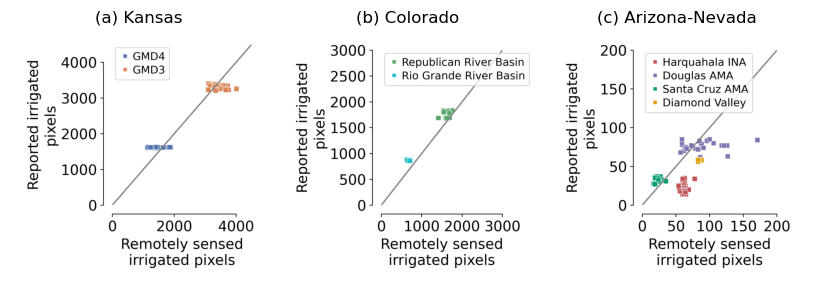

In [47]:
scatter_plots = ['../../Model_run/plots/irr_count_KS.jpg',
                 '../../Model_run/plots/irr_count_CO.jpg',
                 '../../Model_run/plots/irr_count_AZ_NV.jpg']

titles = ['(a) Kansas', '(b) Colorado', '(c) Arizona-Nevada']

join_plot_together(n_cols=3, plots_to_join=scatter_plots, 
                   fig_size=(8, 4), titles=titles, title_fontsize=12,
                   output_plot='../../Model_run/plots/irr_count_all.jpg')